# "Analyzing diet cost and affordability: A dataset from Fill the Nutrient Gap analyses (2015-2021)"

<ul style="list-style-type:none;">
    <li>Jeff Lam</li>
    <li><i>Digital and Data Studies, DiDa325</i></li>
    <li>Date: December 13<sup>th</sup>, 2024</li>
</ul>

## 1 Introduction

<center><i>Reading:</i> [1] <a href="https://www.sciencedirect.com/science/article/pii/S2211912424000609"> Turowska, Z., Klemm, J., de Pee, S. (2024). Analyzing diet cost and affordability: A dataset from Fill the Nutrient Gap analyses (2015-2021)</a></center>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We are a team of data analysts hired by the World Food Programme (WFP) after a seperate team has carried out a data gathering period called "Fill the Nutrient Gap" (FNG). To advance our understanding of (generally speaking as of now) "diet costs" and "non-affordability", we looked at the FNG data gathered with the goal of supporting a more holistic analysis on nutrition challenges at the sub-national level, thereby hopefully enabling more practical policy making across regions where there's low/low-middle income families for better nutrition.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset can be found on the provided link of the reading, under _Appendix A. Supplementary data_ $\rightarrow$ _FNG Dataset ~~2025~~2015-2021_ [1]. The FNG dataset is sourced from WFP's FNG analysis across 37 countries. The team has determined, after additionally doing a careful reading of the main academic journal article, that an appropriate set of research questions to the dataset are to be presented as the following:
1. What is the relationship between non-affordability in urban versus rural areas across countries?
2. How has the cost diet changed over the years?
3. How do household members differ in diets costs amongst themselves and their specifics?

## 2 Dataset

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As mentioned in section 1 __Introduction__, the WFP carried out its FNG analyses across 37 countries between the years 2015-2021. Each analysis, aside from a few early on, calculated indicators which the FNG denotes as: 1) the "energy-sufficient diet"; 2) the "staple-adjusted nutrient-adequate diet"; and, as a derivation from both, 3) "non-affordability".
>  Primary data collection was carried out directly by WFP staff or by trained third-party enumerators using an exhaustive food list. In countries where high-quality food price data already existed, the use of those secondary data were preferred. Secondary sources included data collected by national bureaus of statistics to calculate the Consumer Price Index (CPI), other government market monitoring data and food prices derived from household consumption and expenditure surveys. (Turowska 2024, p.2)

> FNG analyses used only secondary data for estimating expenditure percentiles for the non-affordability calculation. If available, standardized and regularly conducted surveys like the World Bank’s Living Standards Measurement Survey or Household Income and Expenditure Survey were selected. In countries where these data did not exist, other data sources were used, like a food security survey in Afghanistan or a resilience survey in Cambodia. (Turowska 2024, p.2)

So overall recorders of the dataset can be considered as Government partners, WFP country office colleagues, and country stakeholders. Also, the colleagues from the Systems Analysis for Nutrition team.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In 2021–2022, all FNG output data were compiled into one dataset. To define the FNG-specific indicators of (1), (2), and (3):
1. __Energy-sufficient diet cost__: the lowest cost for a diet meeting an individual's/household's caloric need.
2. __Staple-adjusted nutrient-adequate diet costs__: the lowest cost for a nutritious diet _adjusted_ to include culturally staple foods and exclude culturally inappropriate foods (i.e., pork for some religions like Islam).
3. __Non-affordability__: Estimates of the percentage of households that wouldn't be able to afford the energy-sufficient diet costs and staple-adjusted nutrient-adequate diet costs (via comparing the percentile of five-person household food expenditures to household-size adjusted energy-sufficient diet and staple-adjusted nutrient-adequate diet costs).

Additionally, Turowska _et. al._ (2024) recognize that these indicators relies heavily on the currency specific to each time and place. According to the article, both energy-sufficient and staple-adjusted nutrient-adequate diet costs were included in the dataset as both their original values (in local currency) as well as in USD (January 2020 values). This data in USD, however, is present in the form of another (two) metrics: the Market Exchange Rates (MER) and Purchasing Power Parity (PPP). The paper has simple description for both of these:
1. __MER__: "costs of diets in nominal USD values"
2. __PPP__: "values adjusted for differences in country price levels"

(Turowska 2024, p.5)

Both were inflation-adjusted to the same time frame (January 2020). Lastly, a quote from Turowska _et. al._ (2024) will help close of these distinctions:
> Users should consider what currency conversion rates to use for making comparisons. MERs indicate the individual currency market relationship between a given country and the US at the point in time to which the conversion applies, while PPP exchange rates capture the differences between the cost of a basket of goods and services between a given country and the US (Turowska 2024, p.5)

It is worthy to note that non-affordability, as a percentile indicator, is likely unaffected by the caveats discussed so far and therefore its original data is sufficiently valid for our analyses.

### 2.1 Data cleaning

#### __2.1.1__ Downloading the FNG dataset

The following code uses the `requests` module to download the Excel file provided by the link under Turowska _et. al._ (2024)'s _Appendix A. Supplementary data_.

In [11]:
# import requests

# request = requests.get("https://ars.els-cdn.com/content/image/1-s2.0-S2211912424000609-mmc2.xlsx")
# with open("fng_xlsx.xlsx", "wb") as fh: # note: this line will only run if the file doesn't already exists, otherwise permission error raised
#     fh.write(request.content)

#### __2.1.2__ Creating an `Xlsx` class

As mentioned, the file downloaded is an Excel file, i.e., `.xlsx`. Reading the file using `pandas` will not be as straightforward as with `.csv`, especiablly because `fng_xlsx.xlsx` specifically has the multiple datasets under their own spreadsheet each. The following code adapts some of `pandas`'s Excel functions into a simple `class` object.

In [14]:
import pandas as pd
pd.options.display.max_columns = None

class Xlsx:
    def __init__(self, xlsx_file):
        self.ExcelFile = pd.ExcelFile(xlsx_file)
        self.sheets = self.load_sheets()
        self.ExcelFile.close()
    def __getitem__(self, key):
        if key in self.sheets:
            return self.sheets[key]
        else:
            raise KeyError(f"{key}")
    def load_sheets(self):
        xlsx_dict = {i: pd.read_excel(self.ExcelFile, sheet_name=i) for i in self.ExcelFile.sheet_names}
        return xlsx_dict

The `Xlsx` class is meant to mimic most of `pandas`'s `DataFrame` object's properties (i.e., being able to get column values via `.` dot notation and/or `[]` subscript notation), but it's been settled that it can get individual spreadsheet via subscripting. Regardless, we can now properly access the FNG Excel data in `pandas`:

In [16]:
fng = Xlsx("fng_xlsx.xlsx")
fng.ExcelFile.sheet_names # sheet_names is an attribute under pd.ExcelFile

['Codebook', 'Country Description', 'Cost', 'Non-affordability']

#### __2.1.3__ Assigning each spreadsheets

Let's assign each spreadsheet to their own variable as `pd.DataFrame` via subscripting `fng`:

##### __2.1.3.1__ Country Description

In [20]:
country = fng["Country Description"]
country.sample(5)

,Unnamed: 0,Year (Analysis Dissemination ),Expenditure Type,Expenditure Source,Expenditure Year,Food Price Type,Food Price Source,Food Price Year,Number of Price Points,Food Price Month(s),Currency,Analysis Level,Household Size,Nationally Representative (over 50% of population represented in FNG),Donors
33,Tajikistan,2016,Other,World Bank WASH Dataset,2016,Secondary,TajStat CPI Data,2016/2017,2,June,TJS,"Capital Territory, Autonomous Region, Region",6,Yes,"IRM, WFP"
15,Kenya - Refugee Analysis,2021,NaN,NaN,na,Primary Collection,WFP Market Collection,2019,1,Oct,KES,camp,5,No,USAID
21,Mauritania,2020,Food Security Survey,FSMS,2019,Primary Collection,WFP Market Collection,2019,2,Mar,MRU,Livelihood Zones,6,Yes,"BMZ, KFW, USAID, EU, Government of Japan, Gove..."
24,Nepal,2021,Annual Household Survey,AHS 2016/2017,2016,Secondary,Nepal Rastra Bank CPI Data,2019/2020,4,"Sep - Jan, Jan - Mar, Mar - Jun, Jun - Sep",NPR,Agro-ecological Zones by Province,5,Yes,"Government of Japan, KOICA, USAID, WFP"
20,Mali,2020,Food Security Survey,ENSAN,2018,Primary Collection,WFP Market Collection,2019,2,"Apr, Aug",XOF,Livelihood Zones,6,Yes,BMZ


##### __2.1.3.2__ Cost

In [22]:
cost = fng["Cost"]
cost.sample(5)

,mergevar_l2,fngcountryid,ISO,country,subnational_unit_type,subnational_unit_name,area_id,subnational_unit_id,mergevar_l1,price_month,price_avg_month,price_year,price_avg_year,hh_member,hh_id,hh_id_group,cost_energy,cost_nutrient_adq,non_affordability,currency,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_nutrient_adq,M1_2020_PPP_cost_energy
3957,6081599.0,608,PHL,Philippines,region,X,1,15.0,608151.0,July-Nov,m9,2015,2015,Child (either sex) 6-7 years,5,2,9.90,23.97,0.713444,PHP,0.556016,0.229644,1.367684,0.564876
5134,43499.0,4,AFG,Afghanistan,province,Zabul,1,34.0,4341.0,Dec-Jan,m12,2019-2020,2019,"Man, 30-59y, 50 kg, moderately active",8,4,16.49,35.86,0.980000,AFN,0.460697,0.211849,2.118204,0.974043
5112,43399.0,4,AFG,Afghanistan,province,Wardak,2,33.0,4332.0,Dec-Jan,m12,2019-2020,2019,Adolescent girl (14-15 years),7,3,17.92,145.72,999.000000,AFN,1.872080,0.230220,8.607495,1.058512
3219,5241599.0,524,NPL,Nepal,Province/AEZ,Bagmati - Terai,99,15.0,5241599.0,April,m4,2020,2020,Adolescent girl (14-15 years),7,3,33.41,113.64,0.350000,NPR,0.937890,0.275738,3.411573,1.002998
1055,218999.0,218,ECU,Ecuador,province,Esmeraldas,2,9.0,21892.0,Nov-Oct,m4,2013-2014,2013,Child (either sex) 4-5 years,4,2,0.37,0.67,0.400000,dxy,0.743301,0.410480,1.368906,0.755963


##### __2.1.3.3__ Non-affordability

In [24]:
non_afford = fng["Non-affordability"]
non_afford.sample(5)

,mergevar_l1,mergevar_l2,fngcountryid,year,country,subnational_unit_name,subnational_unit_id,other_name_subnational_unit,non_affordability,area_description,area_id,natl_rep,est_weight,Unnamed: 13
406,60812,608199,608,2015,Philippines,ARMM,1,ARMM,0.556132,urban,2,Yes,0.004833,NaN
548,2312099,2312099,231,2019,Ethiopia,"Benishangul Gumuz, Assosa",20,NaN,0.714000,undefined,99,Yes,0.005395,NaN
637,2317099,2317099,231,2019,Ethiopia,Diredawa,70,NaN,0.800000,undefined,99,Yes,0.004945,NaN
531,450799,450799,450,2015,Madagascar,Menabe,7,NaN,0.680000,undefined,99,NaN,0.071429,NaN
266,360301,3603099,360,2019,Indonesia II,Sulawesi Barat,30,NaN,0.390000,urban,1,Yes,0.001027,NaN


##### __2.1.3.4__ Codebook

It may be seen that "Codebook" was omitted in assignment as a spreadsheet. This is because it is only readable on Microsoft Excel, for reading it using `pandas` returns unintelligble data. For viewing purposes on paper, the following is a Markdown adaptation of said spreadsheet:

<table>
<tr>
    <th><p style="text-align: left;"><i>Sheet name: Country Description</i></p></th>
    <th><p style="text-align: left;"><i>Sheet name: Cost</i></p></th>
    <th><p style="text-align: left;"><i>Sheet name: Non-affordability</i></p></th>
</tr>
<tr>
<td>

| __Column__ | __Description__ |
| -- | -- |
| `Year (Analysis Dissemination )` | Year that FNG analysis was disseminated |
| `Expenditure Type` | Type of source of expenditure data |
| `Expenditure Source` | Source of expenditure data |
| `Expenditure Year` | Year of data collections for expenditure data |
| `Food Price Type`  | Type of source for market food prices |
| `Food Price Source`  | Source of food price data |
| `Food Price Year`  | Year of data collection for market food price data |
| `Number of Price Points` | Number of points in time for which cost was calculated (i.e. seasons used in the respective analysis) |
| `Food Price Month(s)` | Specific points in time for which food prices were included in Cost of the Diet calculation |
| `Currency`  | Currency used for respective analysis |
| `Analysis Level` | Type of sub-national divisiions, groupings or dilineations used in analysis |
| `Household Size`  | Number of individuals included in modelled household |
| `Nationally Representative (over 50% of population)` | Y/N; does this analysis cover at least 50% of the households in the country |

</td>
<td>

| __Column__ | __Description__ |
| -- | -- |
| `mergevar_l2` | Level 2 merging variable; distinguishes over country id and subnational unit id |
| `fngcountryid` | Country identification code used in FNG analysis |
| `ISO` | ISO abbreviation for country name |
| `country` | Name of Country |
| `subnational_unit_type` | Type of Subnational unit |
| `subnational_unit_name` | Name of subnational unit |
| `area_id` | Area identification (1=rural, 2=urban, 3=undefined, 4=camp or settlement) |
| `subnational_unit_id` | Subnational unit identification used in FNG analysis |
| `mergevar_l1` | Level 1 merging variables; distinguishes over country id, subnational unit id, and area id |
| `price_month` | Month(s) in which price data was collected |
| `price_avg_month` | Average month for which price data was collected |
| `price_year` | Year(s) in which price data was collected |
| `price_avg_year` | Average year for which price data was collected |
| `hh_member` | Description of household member for which cost estimates are given |
| `hh_id` | Household member identification code |
| `hh_id_group` | Household member bucket type (1=child under 2, 2=School-aged child, 3=Adolescent Girl, 4=Adult Man, 5=Lactating Woman) |
| `cost_energy` | Cost of the energy-sufficient diet in currency used in the analysis |
| `cost_nutrient_adq` | Cost of the nutrient-adeqaute diet in currency used in the analysis |
| `non_affordability` | Non-affordability of the nutrient-adequate diet |
| `currency` | Currency used in the analysis |
| `M1_2020_MER_cost_nutrient_adq` | Cost of the nutrient-adeqaute diet in January 2020 USD - Market Exchange Rate adjusted |
| `M1_2020_MER_cost_energy` | Cost of the energy-sufficient diet in January 2020 USD - Market Exchange Rate adjusted |
| `M1_2020_PPP_nutrient_adq` | Cost `of the nutrient-adeqaute diet in  2020 USD - PPP adjusted |
| `M1_2020_PPP_cost_energy` | Cost of the ~~nutrient-adeqaute~~ energy-sufficient diet in 2020 USD - PPP adjusted |

_Notes: NA refers to data which was not available; 999 refers to a value which could not be estimated._

</td>
<td>

| __Column__ | __Description__ |
| -- | --|
| `mergevar_l1` | Level 1 merging variables; distinguishes over country id, subnational unit id, and area id |
| `mergevar_l2` | Level 2 merging variable; distinguishes over country id and subnational unit id |
| `fngcountryid` | Country identification code used in FNG analysis |
| `year` | Year that FNG analysis was disseminated |
| `country` | Name of Country |
| `subnational_unit_name` | Name of subnational unit |
| `subnational_unit_id` | Subnational unit identification used in FNG analysis |
| `other_name_subnational_unit` | Other common names for subnational unit (i.e. "also known as") |
| `non_affordability` | Non-affordability of the nutrient-adequate diet |
| `area_description` | Type of area (rural, urban, undefined or camp/settlement) |
| `area_id` | Area identification (1=rural, 2=urban, 99=undefined, 4=camp or settlement) |
| `natl_rep` | Y/N; does this analysis cover at least 50% of the households in the country |
| `est_weight` | Estimated population weight |

</td>
</tr>
</table>
<!-- https://stackoverflow.com/questions/43232279/how-can-one-display-tables-side-by-side-in-github-markdown -->
<!-- Also use multiselect to delete tab space -->
<!-- nvm if u just copy the first two columns you avoid the unnecessary spacings -->

#### __2.1.4__ Dropping columns

The main focus of this subsection will be the "Cost" and "Non-affordability" spreadsheets, for these have the data of interests. 

##### __2.1.4.1__ Dropping columns (Cost)

1. Given that there's data in a standard metric (i.e., MER and PPP), we can drop any columns relating to the original values of energy-sufficient and staple-adjusted nutrient-adequate diets.
2. The paper mentions the potential to combine the two dataset into one using the `mergevar_l1` and `mergevar_l2`, but using upon closer inspection the data across both columns from either dataset don't match each other at all (they don't even have the same number of data rows!)— these can be dropped then.
3. There are some identification data relating to when WFP carried out its FNG analyses. These are indecipherable to us so anything here is being dropped as well.
4. The dataset has data distinguishing down to the subnational level. While this is great geographical information, it may get in the way of any analysis via data leakage (i.e., when an $x$-variable secretely has information revealing the correlation).

In [32]:
cost.drop(
    columns=[
        "mergevar_l2", "fngcountryid", "subnational_unit_type", 
        "subnational_unit_name", "subnational_unit_id", "mergevar_l1", 
        "price_avg_month", "price_avg_year", "hh_id",
        "cost_energy", "cost_nutrient_adq", "currency"
    ], inplace=True
)

cost.sample(5)

,ISO,country,area_id,price_month,price_year,hh_member,hh_id_group,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_nutrient_adq,M1_2020_PPP_cost_energy
364,BDI,Burundi,99,Aug,2018,Child (either sex) 12-23 months,1,0.77,0.082640,999.000000,0.234559,999.000000
3220,NPL,Nepal,99,July,2020,Adolescent girl (14-15 years),3,0.35,1.113420,0.279948,3.984467,1.001817
4736,AFG,Afghanistan,1,Dec-Jan,2019-2020,"Woman, 30-59y, 45 kg, moderately active (Lacta...",5,0.80,0.542790,0.271845,2.495654,1.249894
859,LKA,Sri Lanka,99,Aug-Sep,2016,Child (either sex) 6-7 years,2,0.13,0.415247,0.243693,1.300130,0.762999
17,BGD,Bangladesh,2,Apr-Mar,2016-2017,Adolescent girl (14-15 years),3,0.08,0.694447,0.282200,1.908045,0.775366


##### __2.1.4.2__ Dropping Columns (Non-affordability)

1. Like with section __2.1.4.1__, we can drop `merge_lv1` and `merge_lv2` column variables.
2. Likewise, we may also drop any identification data (e.g., `fngcountryid`).
3. And any subnational level data.
4. There is a `Unnamed: 13` column variable at the end, likely due to a data entered in a cell within that column (by whoever collected this data)
5. _Caveat_: While `area_id` was not dropped in the Cost datasheet, it was dropped for Non-affordability because there is an `area_description` column variable.

In [35]:
non_afford.drop(
    columns=[
        "mergevar_l1", "mergevar_l2", "fngcountryid", 
        "subnational_unit_name", "subnational_unit_id", "other_name_subnational_unit",
        "area_id", "Unnamed: 13"
    ], inplace=True
)

non_afford.sample(5)

,year,country,non_affordability,area_description,natl_rep,est_weight
408,2020,Democratic Republic of Congo,0.560,rural,No,0.009400
150,2020,Democratic Republic of Congo,0.260,urban,No,0.009400
641,2019,Ethiopia,0.806,undefined,Yes,0.001785
738,2019,Afghanistan,0.940,undefined,Yes,0.019847
88,2019,Indonesia II,0.160,urban,Yes,0.004700


#### __2.1.5__ Data cleaning (Cost)

##### __2.1.5.1__ Cleaning `M1_2020_MER_cost_nutrient_adq`, `M1_2020_MER_cost_energy`, _etc._

1. These numerical columns are to be first cleaned because there exists broken data just scattered across the four (i.e., `999.0`).
2. Exploit the powerful method of `.dropna()` instead of using conventional filtering techniques (i.e., `.loc[]`, `.query()`).
3. The column name for one out of the four is off.
4. The following code replaces the `999.0` data entries as `NaN` before dropping them (_note_: this step is first also because the next few sections will show that we still have interest to fill other missing data as `NaN`, but not to drop it).

In [39]:
import numpy as np

cost.replace(999., np.NaN, inplace=True) 
cost.dropna(inplace=True) # originally tried .isin() and .query(), both very difficult to manage; this way easier

cost.rename( # yes I noticed that this was missing "cost" in its label
    columns={"M1_2020_PPP_nutrient_adq": "M1_2020_PPP_cost_nutrient_adq"},
    inplace=True
)

cost.sample(5)

,ISO,country,area_id,price_month,price_year,hh_member,hh_id_group,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
313,BDI,Burundi,99,Aug,2018,"Man, 30-59y, 50 kg, moderately active",4,0.710000,0.524001,0.330131,1.487283,0.937016
5789,IDN,Indonesia II,1,Mar,2019,Adolescent girl (14-15 years),3,0.070000,1.041330,0.311273,3.108854,0.929293
1633,ETH,Ethiopia,99,feb-may,2019,Adolescent girl (14-15 years),3,0.785000,1.131788,0.223847,3.076741,0.608522
2463,ETH,Ethiopia,99,oct-jan,2018,"Man, 30-59y, 55 kg, moderately active",4,0.660000,0.751325,0.241879,2.170474,0.698754
3822,PHL,Philippines,1,July-Nov,2015,Child (either sex) 6-7 years,2,0.587228,0.520062,0.425653,1.279244,1.047017


##### __2.1.5.2__ Cleaning `area_id`

1. A simple `.value_counts()` reveals that there is actually one more value included than the three listed according to the Codebook: `99`.
2. This is likely the null-value as mentioned as a note under Cost's description table within the Codebook (so it's supposedly similar to the value of `3`: "undefined"). However, as it actually makes up the majority of the dataset, this cannot be dropped.
3. The following code simply renames the column data with more appropriate labels. 

In [42]:
area_id_dict = {
    1 : "rural",
    2 : "urban", 
    3 : np.NaN,
    4 : "camp",
    99: np.NaN
}

cost.area_id = cost.area_id.apply(lambda x: area_id_dict[x]) # .map() is another alternative
cost.rename(columns={"area_id": "area_description"}, inplace=True)

cost.sample(5)

,ISO,country,area_description,price_month,price_year,hh_member,hh_id_group,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
2998,MDG,Madagascar,rural,Aug,2015,Child (either sex) 6-7 years,2,0.84,0.213598,0.158362,0.790003,0.585710
428,KHM,Cambodia,NaN,Mar,2017,"Woman, 30-59y, 45 kg, moderately active (Lacta...",5,0.24,1.219599,0.321153,3.395877,0.894224
2971,MDG,Madagascar,NaN,Aug,2015,"Man, 30-59y, 50 kg, moderately active",4,0.65,0.309352,0.249759,1.144153,0.923747
5358,COD,Democratic Republic of Congo,rural,Apr,2020,Child (either sex) 4-5 years,2,0.80,0.452883,0.184578,0.852131,0.347296
5304,COD,Democratic Republic of Congo,urban,Apr,2020,Child (either sex) 4-5 years,2,0.47,0.312821,0.174232,0.588595,0.327830


##### __2.1.5.3__ Cleaning `price_month`

1. The dating convention of this column value are all over the place: some are abbreviated, some aren't, and others are either (e.g., "Sep" vs. "September" vs. "Sept")— and some are capitalized while others aren't.
2. The following code cleans via the `.apply()` method to apply various functions down the entire column. The column name is also renamed to match with `area_description` like with the Non-affordability dataset.

In [45]:
cost.price_month = cost.price_month.apply(lambda x: x.lower().split("-")) # will lowercase all text, then split by -; inplace method
cost.price_month = cost.price_month.apply(lambda x: [i[:3] for i in x]) # list comprehension in apply method

cost.sample(5)

,ISO,country,area_description,price_month,price_year,hh_member,hh_id_group,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
3746,PAK,Pakistan,rural,"[oct, feb]",2013/2014,Child (either sex) 12-23 months,1,0.593,0.155313,0.058398,0.582156,0.218891
1849,ETH,Ethiopia,NaN,"[feb, may]",2019,"Woman, 30-59y, 50 kg, moderately active (Lacta...",5,0.918,1.752747,0.290211,4.764804,0.788933
2364,ETH,Ethiopia,NaN,"[oct, jan]",2018,Child (either sex) 12-23 months,1,0.734,0.122441,0.041036,0.353714,0.118547
4360,TZA,Tanzania,NaN,[jul],2016,Child (either sex) 6-7 years,2,0.510,0.355309,0.205328,0.914575,0.528521
334,BDI,Burundi,NaN,[aug],2018,Child (either sex) 12-23 months,1,0.570,0.094737,0.039284,0.268895,0.111502


##### __2.1.5.4__ Cleaning `price_year`

1. Exploring this column value reveals that it actually contains mixed datatypes (of type `int` and `str`). This is likely caused by any data being input as a range (e.g., "2015-2016"), where `pandas` likely interprets this as a string rather than something more complex like a list of integers.
2. Upon even further exploration (i.e., `cost.price_year.value_counts()`), there's a specific datatype entered as `2013/2014`. The paper mentions updated data being in the range of the years 2015-2021., but both `2013-2014` and `2013/2014` datatypes make up significant portions of the dataset, so rather than dropping it we should continue cleaning the data, including the big mishap that is the latter.
4. The following code uses the process of forming a boolean array with a certain condition passed, then similarly using the `.apply()` method as in section __2.1.5.2__. Since there's also a desire to split with both `-` and `/` as delimiters, the `re` (i.e., _regex_) library was used.

In [48]:
import re

int_array = cost.price_year.apply(lambda x: isinstance(x, int)) # use .isinstance() as the boolean function
cost.loc[int_array, "price_year"] = cost.price_year.loc[int_array].apply(lambda x: [x]) # got a warning here

str_array = cost.price_year.apply(lambda x: isinstance(x, str)) # originally was the negation of the previous
cost.loc[str_array, "price_year"] = cost.price_year.loc[str_array].apply(
    lambda x: np.array(re.split("-|/", x)).astype(int).tolist()
) # "|" is the "or" logic of regex; automatically returns as lists. Then typecast the list of STRING years as np.array() to use .astype()
# must be brought back to list because .value_counts() does not seem to work with np.array()'s

cost.sample(5)

,ISO,country,area_description,price_month,price_year,hh_member,hh_id_group,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
3682,NER,Niger II,NaN,[dec],[2019],Adolescent girl (14-15 years),3,0.588,0.684459,0.157695,1.567475,0.361137
5356,COD,Democratic Republic of Congo,urban,[apr],[2020],"Man, 30-59y, 55 kg, moderately active",4,0.490,0.787840,0.719428,1.482375,1.353654
5423,COD,Democratic Republic of Congo,urban,[apr],[2019],Child (either sex) 12-23 months,1,0.370,0.095590,0.038545,0.198099,0.079879
4837,AFG,Afghanistan,rural,"[dec, jan]","[2019, 2020]",Child (either sex) 6-7 years,2,0.780,0.102135,0.107016,0.469596,0.492042
3112,MOZ,Mozambique,rural,"[feb, oct]",[2015],"Man, 30-59y, 50 kg, moderately active",4,0.460,0.594377,0.307864,1.219261,0.631530


##### __2.1.5.5__ Cleaning `hh_member` and `hh_id_group`

1. A `.value_counts()` of `hh_member` column value reveals an extraordinary number of unique data entries, all with some description of age group, sex, and lactation/activity.
2. Despite the inconsistent description convention, we may attempt to interpret some key words for each unique entry as one-hot encoded columns (i.e., do something similar as `pd.get_dummies()`).
3. While `hh_id_group` may seem to help ignore the age-group description part of `hh_member`, there's (yet another) extra data value entered, `6`, which seems to denote elderly individuals when the code `cost.query("hh_id_group == 6").hh_member.value_counts()` is ran.
4. There is also an additional data entry in `hh_id_group`, `PLW`. There is no context for this in either the paper or the Codebook as well as it's low in entry, so this may be safely dropped.
5. The following code does a number of cleaning:
    1. Drops any rows with `PLW` as a data entry using the `.query()` method.
    2. Transforms the `hh_member` column all into a tuple datatype via manually creating a dictionary that preserves the descriptions the best it can.
    3. Turns the new tuple column value into a dataframe using both `pandas` and `numpy`.
    4. Inserts the expanded description columns into the original dataframe.
    5. Drops `hh_member` and `hh_id_group` as old data being discarded.

In [51]:
cost = cost.query("hh_member != 'PLW'") # .query(<column_name>.str.startswith()) was an excellent debugging tool
cost.reset_index(drop=True, inplace=True) # very important piece of code; if not ran will interfere with pd.concat() on line 46

hh_member_dict = { # convention: "male", "age_group", "weight_kg", "activity", "lactation"; I am going to consider any child <= 2 in age years as an infant
    "Adolescent girl (14-15 years)"                                        : (False, "Adolescent", np.NaN, np.NaN, False),
    "Child (either sex) 12-23 months"                                      : (np.NaN, "Infant", np.NaN, np.NaN, False),
    "Child (either sex) 6-7 years"                                         : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Woman, 30-59y, 45 kg, moderately active (Lactation, 7-12 months)"     : (False, "Adult", 45, "moderate", True),
    "Man, 30-59y, 50 kg, moderately active"                                : (True, "Adult", 50, "moderate", False),
    "Man, 30-59y, 55 kg, moderately active"                                : (True, "Adult", 55, "moderate", False),
    "Woman, 30-59y, 50 kg, moderately active (Lactation, 7-12 months)"     : (False, "Adult", 50, "moderate", True),
    "Child (either sex) 10-11 years"                                       : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Child (either sex) 4-5 years"                                         : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Woman,  >60y, 50kg, moderately active"                                : (False, "Elder", 50, "moderate", False),
    "Woman,  >60y, 45 kg, moderately active"                               : (False, "Elder", 45, "moderate", False),
    "Child (either sex) 9-11 months"                                       : (np.NaN, "Infant", np.NaN, np.NaN, False),
    "Adult Man"                                                            : (True, "Adult", np.NaN, np.NaN, False),
    "Adolescent Girl"                                                      : (False, "Adolescent", np.NaN, np.NaN, False),
    "Child 6-7y"                                                           : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Child 12-23m"                                                         : (np.NaN, "Infant", np.NaN, np.NaN, False),
    "Man, 30-59y, 60 kg, moderately active"                                : (True, "Adult", 60, "moderate", False),
    "Woman, 30-59y, 45 kg, moderately active (Lactation, semester average)": (False, "Adult", 45, "moderate", True),
    "Man, 30-59y, 55 kg, vigorously active"                                : (True, "Adult", 55, "vigorous", False),
    "Woman, 30-59y, 50 kg, vigorously active (Lactation, 7-12 months)"     : (False, "Adult", 50, "vigorous", True),
    "Child (either sex) 6-8 months"                                        : (np.NaN, "Infant", np.NaN, np.NaN, False),
    "Child (either sex) 9-10 years"                                        : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Man, >60, 50 kg, moderately active"                                   : (True, "Elder", 50, "moderate", False),
    "Woman, 30-59y, 55 kg, moderately active (Lactation, 7-12 months)"     : (False, "Adult", 55, "moderate", True),
    "Adolescent girl (15-16 years)"                                        : (False, "Adolescent", np.NaN, np.NaN, False),
    "Woman,  >60y, 50 kg, vigorously active"                               : (False, "Elder", 50, "vigorous", False),
    "Woman, 30-59y, 45 kg, moderately active (Pregnancy, Third Trimester)" : (False, "Adult", 45, "moderate", False),
    "Child (either sex) 12-13 years"                                       : (np.NaN, "Child", np.NaN, np.NaN, False),
    "Child (either sex) 8-9 years"                                         : (np.NaN, "Child", np.NaN, np.NaN, False)
} # could also get the keys via cost.hh_member.unique(), but doing this helps keep track on the manual mapping

cost.loc[:, "hh_member"] = cost.hh_member.apply(lambda x: hh_member_dict[x.strip()]) # .loc[row_indexer, col_indexer]; got a warning here

cost_appendix = pd.DataFrame( # now that hh_member are all tuple datatypes of the same size, let's (in a sense) expand the column value
    np.array(cost.hh_member.to_list()), # .to_list() will make the column value into a 1D array, then np.array() will automatically make it into a 2D array
    columns=["male", "age_group", "weight_kg", "activity", "lactation"]
)
cost_appendix.replace("nan", np.NaN, inplace=True) # weirdly enough, np.NaN didn't get carried over; replacing the value again then
cost_appendix.replace("True", True, inplace=True) # and same thing here
cost_appendix.replace("False", False, inplace=True)

i = cost.columns.to_list().index("hh_member") # get the column index number of hh_member; generically calling it "i"
cost = pd.concat(
    [
        cost.iloc[:, :i], # the LEFT side of the original dataframe (all rows, leftmost columns)
        cost_appendix, # the NEW columns as a dataframe
        cost.iloc[:, i:] # the RIGHT side of the original dataframe (all rows, rightmost columns)
    ], axis=1 # and of course we have to specify this is concatentating on the columns
)

cost.drop(columns=["hh_member", "hh_id_group"], inplace=True) # and now we can safely drop BOTH hh_member and hh_id_group
cost.sample(5)

C:\Users\Jeff Lam\AppData\Local\Temp\ipykernel_6012\3444191728.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cost_appendix.replace("False", False, inplace=True)


,ISO,country,area_description,price_month,price_year,male,age_group,weight_kg,activity,lactation,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
2744,LAO,Laos,NaN,"[feb, mar]",[2017],False,Adolescent,NaN,NaN,False,0.950,2.405516,0.580691,7.061429,1.704628
2626,KGZ,Kyrgyz Republic,NaN,"[jan, feb]",[2017],NaN,Child,NaN,NaN,False,0.330,0.468525,0.167210,1.914938,0.683414
3662,PAK,Pakistan,urban,"[mar, sep]",[2014],NaN,Infant,NaN,NaN,False,0.669,0.230915,0.040245,0.747592,0.130295
2098,ETH,Ethiopia,NaN,"[oct, jan]",[2018],False,Adult,50,moderate,True,0.760,0.837734,0.218858,2.420097,0.632252
2395,ETH,Ethiopia,NaN,"[oct, jan]",[2018],True,Adult,55,moderate,False,0.836,0.862756,0.336295,2.492382,0.971509


_Remarks_: The loss in data after cleaning went from 6182 rows to 5682 rows.

#### __2.1.6__ Data cleaning (Non-affordability)

##### __2.1.6.1__ Cleaning `non-affordability`

1. Similarly to section __2.1.5.1__, there are `999.0` which are (of a terrible convention) denotation of broken data.
2. Clean this using `.replace()` and `.dropna()` again.

In [56]:
non_afford.replace(999., np.NaN, inplace=True)
non_afford.dropna(inplace=True)

non_afford.sample(5)

,year,country,non_affordability,area_description,natl_rep,est_weight
720,2019,Afghanistan,0.900000,undefined,Yes,0.020557
584,2019,Zambia,0.750000,rural,Yes,0.091483
154,2020,Democratic Republic of Congo,0.270000,urban,No,0.009400
547,2015,Philippines,0.713444,rural,Yes,0.027338
582,2015,Mozambique,0.750000,urban,Yes,0.020000


##### __2.1.6.2__ Cleaning `area_description`

1. Similar to section __2.1.5.2__, only except cleaning an ID-like system we're cleaning a description.
2. Only unique data entries are `urban`, `rural`, and `undefined`. Use `NaN` as convention for `undefine` instead.

In [59]:
non_afford.replace("undefined", np.NaN, inplace=True) # don't need to specifically call this on ".area_description", it's the only column with "undefined"
non_afford.sample(5)

,year,country,non_affordability,area_description,natl_rep,est_weight
95,2015,Philippines,0.170605,urban,Yes,0.004600
85,2016,Bangladesh,0.160000,rural,Yes,0.088235
597,2020,Democratic Republic of Congo,0.760000,rural,No,0.013400
423,2020,Democratic Republic of Congo,0.570000,urban,No,0.007400
7,2019,Indonesia II,0.040000,urban,Yes,0.007651


##### __2.1.6.3__ Cleaning `natl_rep`

1. A `.value_counts()` call on this column value shows 3 unique data entries: `yes`, `Yes`, and `No`.
2. First lowercase all entries on this column, then make it into a `True`/`False` column value— the following code achieves this.

In [62]:
non_afford.natl_rep = non_afford.natl_rep.apply(lambda x: x.casefold()) # .casefold() is a stronger, more aggressive method than .lower()
non_afford.natl_rep = (non_afford.natl_rep == "yes")

non_afford.sample(5)

,year,country,non_affordability,area_description,natl_rep,est_weight
52,2016,Sri Lanka,0.110000,NaN,True,0.040922
430,2017,Myanmar,0.570000,NaN,True,0.030000
549,2019,Afghanistan,0.715325,NaN,True,0.081228
333,2017,Myanmar,0.480000,NaN,True,0.130000
343,2016,Tanzania,0.490000,NaN,True,0.016100


_Remark_: The loss in data after cleaning went from 819 rows to 757 rows.

### __2.2__ Question 1: "What is the relationship between non-affordability in urban versus rural areas across countries?"

#### __2.2.1__ Visualization and setup

##### __2.2.1.1__ `non_affordability`

1. Both Cost and Non-affordability has `non_affordability` as column values. While section __2.1__ has shown Cost to be a more comprehensive dataset than Non-affordability, we can nonetheless combine both dataset's `non_affordability` for more data.
2. Once both dataset's isolated columns are combined, call on `.dropna()` to remove data entries which had no area description specification— this will reduce our total number of data from 6439 to 2505.

In [68]:
non_affordability = pd.concat(
    [
        cost[["country", "area_description", "non_affordability"]], 
        non_afford[["country", "area_description", "non_affordability"]]
    ], axis=0
)

non_affordability.dropna(inplace=True)

non_affordability.sample(5)

,country,area_description,non_affordability
5522,Cameroon,rural,0.734000
1159,Ecuador,urban,0.390000
224,Philippines,urban,0.347834
5315,Indonesia II,urban,0.020000
996,Ecuador,rural,0.450000


##### __2.2.1.2__ Bar graph

1. A bar graph was considered the best plot to represent non-affordability over countries and area type, for both the latter were categorical variables
2. For ease of viewing, a horizontal bar plot was constructed, for country names on the bottom would cause either labels overlapping or an absurd graph width needed to fit them all.
3. A stacked bar graph was also chosen rather than a dodge or multiple variation for clarity on the ratio of non-affordability across rural and urban areas.
4. Errorbars were also included to understand the uncertainty of the results across each countries.

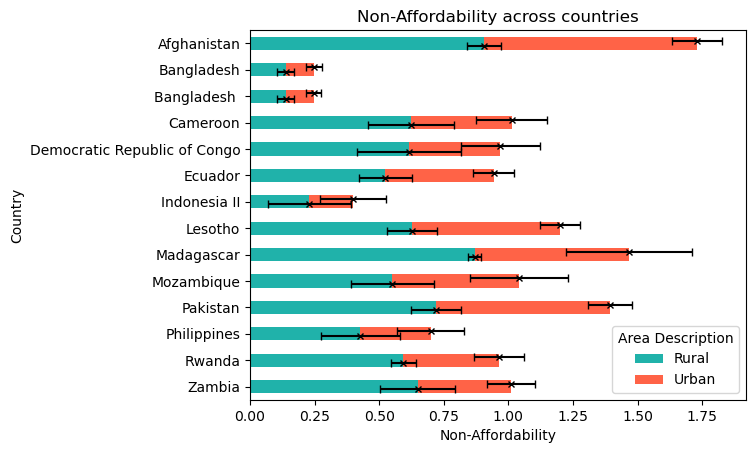

In [71]:
import matplotlib.pyplot as plt

pivot_table = non_affordability.pivot_table(
    values="non_affordability",
    index="country",
    columns="area_description",
    aggfunc=["mean", "std"]
).sort_values(
    ascending=False,
    by="country"
)

pivot_table["mean"].plot( # if errorbars were unnecessary, than this can be chained too
    kind="barh",
    stacked=True,
    color=["lightseagreen", "tomato"],
)

for n, i in enumerate(("rural", "urban")):
    plt.errorbar( # very barebone function— controls over actual x & y coordinates.
        pivot_table["mean"][i] if i == "rural" else pivot_table["mean"]["rural"] + pivot_table["mean"]["urban"], # was able to get away with ternary b/c it's only 2 stacks
        np.arange(pivot_table.index.size) - 0.1 + 0.2*n, # simple math to get the offsets
        xerr=pivot_table["std"][i],
        linestyle="none",
        color="black",
        marker="x",
        markersize=5,
        capsize=3
    )

plt.title("Non-Affordability across countries")
plt.xlabel("Non-Affordability")
plt.ylabel("Country")
plt.legend(title="Area Description", labels=("Rural", "Urban"))

plt.show()

#### __2.2.2__ Analysis: logistic regression

1. Since `country` and `area_description` are categorical variables, with `non_affordability` as a continuous variable type, a logistic regression was considered an appropriate analysis to carry out.
2. Because logistic regressions are a type of predictive modeling, `country` data was omitted for it could cause data leakage.

In [74]:
import statsmodels.api as sm

y = non_affordability.pop("non_affordability")
xs = non_affordability.pop("area_description")

xs = pd.get_dummies(xs, drop_first=True).astype("float32")
xs = sm.tools.tools.add_constant(xs)

model = sm.Logit(y, xs).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.660530
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      non_affordability   No. Observations:                 2505
Model:                          Logit   Df Residuals:                     2503
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                 0.04405
Time:                        12:10:16   Log-Likelihood:                -1654.6
converged:                       True   LL-Null:                       -1730.9
Covariance Type:            nonrobust   LLR p-value:                 4.942e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2992      0.056      5.324      0.000       0.189       0.409
urban         -0.7684      0.

#### 2.2.3 Results and discussions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From section __2.2.1__, the stacked bar graph seems to indicate that certainly the non-affordability across urban areas are less than rural areas, although only slightly (i.e., the ratio seems somewhat equal). The length of the errorbars alone as an indicator of uncertaincy can help denote which countries has the most uncertainties, but another general rule of thumb to consider is since this is a stacked bar graph, if a country's error bar overlaps then there's even greater uncertaincy within that country's non-affordability mean.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For section __2.2.2__'s analysis, because country data was omitted as part of the logistic regression, area description data stand alone as the only other affecting variable. With a $p$-value $\ll$ 0.05, it is statistically significant and therefore we may interpret its coefficient. With a coefficient of -0.7684, we can say as a country's region becomes more urban, the lower non-affordability becomes, which also means food would generally be more affordable there. This is in contrast to what one can tell from the visualization, because it seems like the ratio of unaffordability between urban and rural areas across countries are somewhat equal, but there's indeed a correlation according to this analysis.

### __2.3__ Question 2: "How has the cost diet changed over the years?"

#### __2.3.1__ Visualizations and setup

##### __2.3.1.1__ `month_year_continuous`

1. A big challenge of visualizing this research question is accounting for both `price_month` and `price_year` as one continuous $x$-variable.
2. A precursory view into both of these column values suggests the following pattern:
    1. If `price_year` is listed as _one year_, then `price_month` has a range of months that _doesn't carry over_ (i.e., doesn't go over to next year's set of months). \
       $\underline{\mathscr{Ex}:}$ 
       <table style="text-align: left; margin-left: 0;"> <!-- margin-left: 0; was very important -->
       <tr>
       <td>
        
       <table>
           <tr>
               <td><code>price_month</code></td>
               <td><code>price_year</code></td>
           </tr>
           <tr>
               <td>[jan, dec]</td>
               <td>[2015]</td>
           </tr>
       </table>
       <!-- example can be seen by as row 80 of cost before transformation -->
       </td>
       <td>
       or
       </td>
       <td>
       
       <table>
           <tr>
               <td><code>price_month</code></td>
               <td><code>price_year</code></td>
           </tr>
           <tr>
               <td>[sep]</td>
               <td>[2020]</td>
           </tr>
       </table>
       <!-- and this here is row 5677 -->
       <!-- cost.loc[cost.price_year.apply(lambda x: len(x) == 1)] -->
       </td>
       </tr>
       </table>
    1. If `price_year` is listed as _multiple years_, then
       <ol>
           <li>The range of years is <i>always</i> only 2 (e.g., "2013-2014").</li>
           <li>The range of months <i>always carries over</i> (note: this is not an assumption; this has been confirmed off-script).</li>
       </ol>
       
       $\underline{\mathscr{Ex}:}$
       <table style="text-align: left; margin-left: 0;">
           <tr>
               <td><code>price_month</code></td>
               <td><code>price_year</code></td>
           </tr>
           <tr>
               <td>[apr, mar]</td>
               <td>[2016, 2017]</td>
           </tr>
       </table>
       <!-- this is just the very first row, i.e., row 0 -->
       <!-- cost.loc[cost.price_year.apply(lambda x: len(x) > 1)]
       test.price_month.apply(lambda x: pd.Series(x).map(month_dict).to_numpy()[0] < pd.Series(x).map(month_dict).to_numpy()[1]).value_counts() -->
3. We may then follow this methodology:
    1. Represent `price_month` as _numbers_ (e.g., "jan" is the 1<sup>st</sup> month, _etc._).
    2. Represent `price_year` as _shifts in months_ (e.g., 2015 is a 24-month shift from 2013, _etc._).
    3. Shift the month numbers, then take the _median_ of the range.

   As a simple `.value_counts()` on `price_year` confirms that the earliest year was 2013, the following code achieves this methodology and replaces both column values with a new one, `month_year_continuous`.

In [81]:
month_dict = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

def month_year_continuous(row):
    price_month, price_year = row["price_month"], row["price_year"]
    
    months = pd.Series(price_month).map(month_dict) # map the string-represented months as numbers
    shift = 12*(np.array(price_year)-2013) # will return the respective shifts; e.g., jan., 2014 is the 13TH MONTH of our timeline

    return np.median(shift + months) # addition operation on np.array()'s works very well; np.median() also works very well

cost.price_month = cost[["price_month", "price_year"]].apply(month_year_continuous, axis=1)
cost.rename(columns={"price_month": "month_year_continuous"}, inplace=True)
cost.drop(columns=["price_year"], inplace=True)

cost.sample(5)

,ISO,country,area_description,month_year_continuous,male,age_group,weight_kg,activity,lactation,non_affordability,M1_2020_MER_cost_nutrient_adq,M1_2020_MER_cost_energy,M1_2020_PPP_cost_nutrient_adq,M1_2020_PPP_cost_energy
4376,AFG,Afghanistan,urban,84.5,NaN,Infant,NaN,NaN,False,0.870000,0.485364,0.057555,2.231616,0.264628
2994,MOZ,Mozambique,urban,30.0,NaN,Child,NaN,NaN,False,0.300000,0.258814,0.117721,0.530911,0.241485
138,MMR,Myanmar,NaN,49.0,False,Adolescent,NaN,NaN,False,0.570000,1.248813,0.304147,4.607380,1.122123
3970,UGA,Uganda,NaN,33.0,NaN,Child,NaN,NaN,False,0.566000,0.233483,0.064884,0.734524,0.204122
3613,NER,Niger II,NaN,76.0,False,Elder,45,moderate,False,0.630333,0.312585,0.138073,0.708830,0.313099


##### __2.3.1.2__ Scatter plots

1. Actually, the research question was originally "How has the cost diet changed over the years across all the countries?", and the graph of choice would have been a multiple line graph with distinctions to each country.
2. But setting up a `pivot_table()` with `index="country"` and `columns="month_year_continuous"` reveals that most countries were not persistently studied over the years, e.g., Ghana in the original data was only studied in October 2015. Hence, the research question was changed to what's current.
3. The following code uses `pivot_table()` to get the mean and standard deviations of every month-year continuous variables, then plot them as four scatterplots— two under the MER values and _vice versa_.

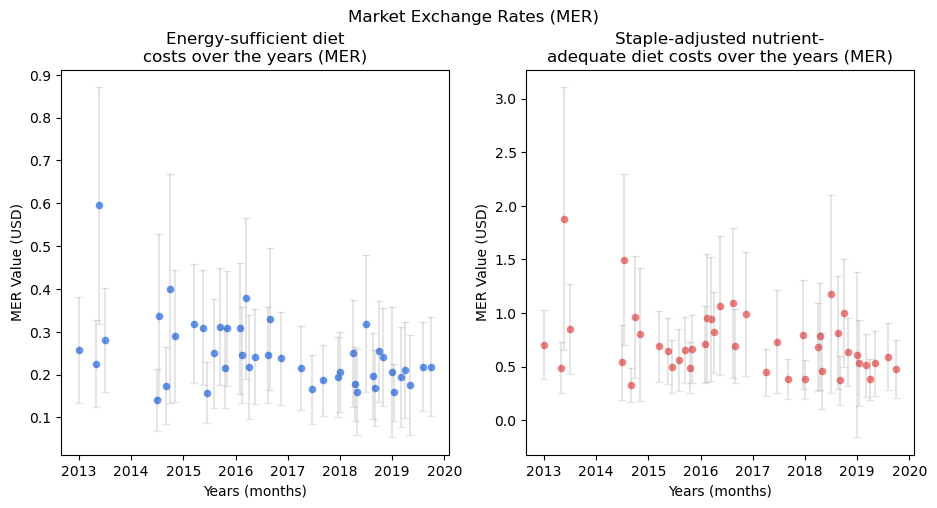

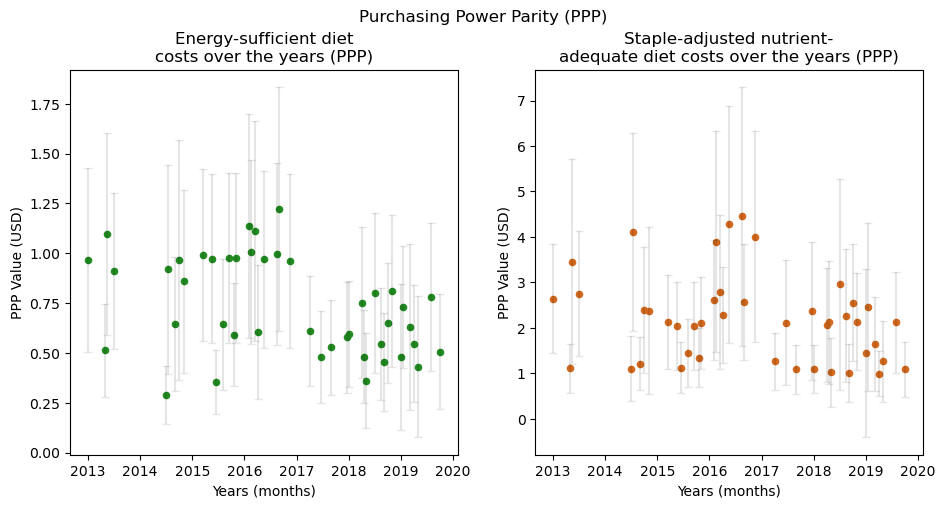

In [84]:
diets = pd.concat([cost.month_year_continuous, cost.iloc[:, 10:]], axis=1) # I was too lazy to write out all the columns

values = ["M1_2020_MER_cost_energy", "M1_2020_MER_cost_nutrient_adq", "M1_2020_PPP_cost_energy", "M1_2020_PPP_cost_nutrient_adq"] # changed the order
pivot_table = diets.pivot_table( # decided to reassign "pivot_table" after every subsection...
    values=values,
    index="month_year_continuous",
    aggfunc=["mean", "std"]
)

colors = ("cornflowerblue", "lightcoral", "forestgreen", "chocolate")
def section_2_3_1_2(): # had to turn this into a function for the section 2.3.2 analysis portion...
    global fig1, fig2, ax1, ax2, ax3, ax4
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5)) # 1 row, 2 columns
    fig1.suptitle("Market Exchange Rates (MER)", y=1) # move title a little higher via "y="
    
    fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    fig2.suptitle("Purchasing Power Parity (PPP)", y=1)
    
    for ax, i, j in zip((ax1, ax2, ax3, ax4), values, colors):
        ax.scatter(
            pivot_table.index, 
            pivot_table["mean"][i],
            s=20,
            c=j
        )
        ax.errorbar(
            pivot_table.index, 
            pivot_table["mean"][i], 
            yerr=pivot_table["std"][i],
            linestyle="none",
            color="black",
            capsize=3,
            alpha=0.1 # tenth of opacity
        )
        ax.set_xticks(12*np.arange(1, 8+1), labels=np.arange(2013, 2020+1).astype("str"))
        ax.set_xlabel("Years (months)")
        ax.set_ylabel(f"{i.split('_')[2]} Value (USD)")
    
    ax1.set_title("Energy-sufficient diet\ncosts over the years (MER)")
    ax2.set_title("Staple-adjusted nutrient-\nadequate diet costs over the years (MER)")
    ax3.set_title("Energy-sufficient diet\ncosts over the years (PPP)")
    ax4.set_title("Staple-adjusted nutrient-\nadequate diet costs over the years (PPP)")

section_2_3_1_2()
plt.show()

#### __2.3.2__ Analyis: linear regressions

1. As section __2.3.1.2__'s graph choice was scatter plots, a linear regression is the natural next step.
2. The following (complex) code retrieves necessary results from `statsmodel.api.OLS().fit()`, shows section __2.3.1.2__'s scatterplots with lines of best fits, then show respective residual plots and error sizes.

In [87]:
ys = diets[values]
x = diets.month_year_continuous
x = sm.tools.tools.add_constant(x)

yhats, lin_regs = [], []
for i in values:
    model = sm.OLS(ys[i], x).fit()
    yhats.append(model.predict())
    lin_regs.append(
        np.append(model.params.to_numpy(), model.pvalues.iloc[1]) #  got a warning here
    )
    
analysis = pd.DataFrame(
    lin_regs,
    index=values,
    columns=["Constants $b$", "Coefficients $m$", "$p$-values"],
)

analysis

,Constants $b$,Coefficients $m$,$p$-values
M1_2020_MER_cost_energy,0.435172,-0.003010,1.922598e-225
M1_2020_MER_cost_nutrient_adq,1.194030,-0.007365,3.259656e-109
M1_2020_PPP_cost_energy,1.077681,-0.006140,1.104234e-135
M1_2020_PPP_cost_nutrient_adq,2.892795,-0.013296,7.639830e-51


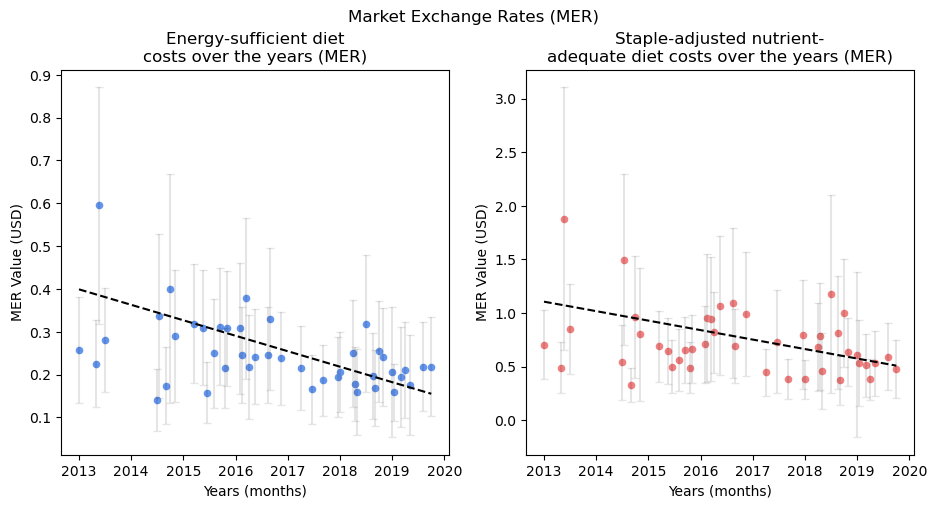

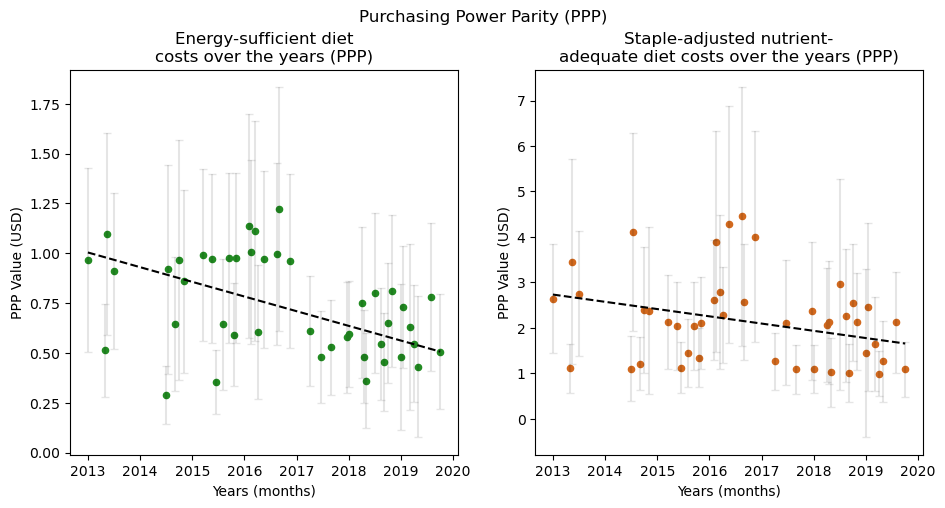

In [88]:
xs = pivot_table.index
m = analysis["Coefficients $m$"]
b = analysis["Constants $b$"]

section_2_3_1_2()
for n, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.plot(xs, m.iloc[n]*xs+b.iloc[n], "--k")

plt.show()

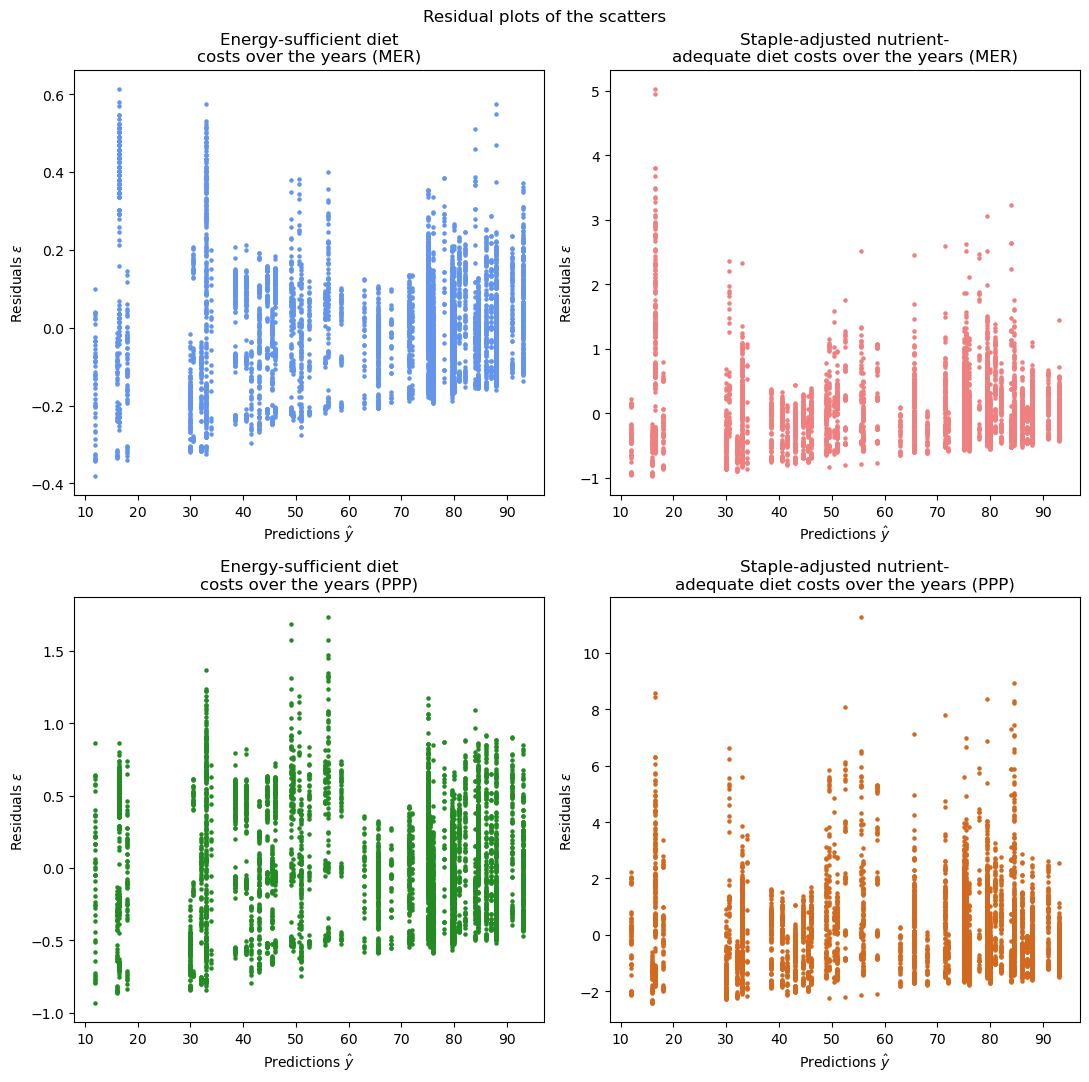

In [89]:
residuals = diets[values].to_numpy() - np.array(yhats).T

fig, axes = plt.subplots(2, 2, figsize=(11, 11)) # get a 2x2 array of axes
(ax1, ax2), (ax3, ax4) = axes # flatten them like so

fig.suptitle("Residual plots of the scatters")

for n, ax in enumerate((ax1, ax2, ax3, ax4)):
    ax.scatter(
        diets.month_year_continuous, 
        residuals[:, n],
        s=5,
        c=colors[n],
    )
    ax.set_xlabel("Predictions $\hat{y}$")
    ax.set_ylabel("Residuals $\epsilon$")

ax1.set_title("Energy-sufficient diet\ncosts over the years (MER)")
ax2.set_title("Staple-adjusted nutrient-\nadequate diet costs over the years (MER)")
ax3.set_title("Energy-sufficient diet\ncosts over the years (PPP)")
ax4.set_title("Staple-adjusted nutrient-\nadequate diet costs over the years (PPP)")

plt.tight_layout() # this actually worked this time
plt.show()

In [90]:
error = [np.std(residuals[:, n]) for n in range(residuals.shape[1])]

pd.DataFrame(error).T.rename(
    columns=(dict(zip((0, 1, 2, 3), values)))
).set_index(
    pd.Series(["Error size"])
)

,M1_2020_MER_cost_energy,M1_2020_MER_cost_nutrient_adq,M1_2020_PPP_cost_energy,M1_2020_PPP_cost_nutrient_adq
Error size,0.153282,0.554712,0.411946,1.500403


#### __2.3.3__ Results and Discussions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From section __2.3.1.2__'s visualtions, the scatterplots may seem to follow a linear trend, however even before linear regressions were performed the errorbars (which were so large they had to become translucent) indicate that there were huge variability for every data points— this is true regardless of the conversion metric or type of diet cost. From the linear regressions, all scatter plots had $p$-values $\lll$ 0.05 (like way, way less than), so time as a variable is indeed a statistically significant factor, but while plotting the lines of best fits may seem to reinforce the idea of linear trends, residual plots indicate that at least the energy-sufficient diets— both MERs and PPPs— do not have proper variance to support linear regression as the best model for them.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finally, for typical error sizes it's also pretty spread out, with energy-sufficient diet costs in MERs being the best while staple-adjusted nutrient-sufficient diet costs in PPP being the worst.

### __2.4__ Question 3: "How do household members differ in diets costs amongst themselves and their specifics?"

#### __2.4.1__ Visualizations and setup

##### __2.4.1.1__ Multiple pivot tables
1. This research question is appropriated to visualizations on two fronts: _general_ diet costs across the (five) household member types, and _specific_ diet costs relating to other characteristics (e.g., sex, weight, activity, _etc._).
2. The general diet costs is straightforward to plot, but only a few characteristics— _i.e.,_ sex and weight— were deemed sufficient in data to plot and represent. The rest— _i.e.,_ activity and lactation— had respective issues of the following:
    1. The `.value_counts()` on the `activity` column reveals 2169 valid rows of "moderate" data entries and _40_ valid rows of "vigorous" data entries. Given the extreme disparity in sample size, this specific for visualization is deemed insufficient for proper representation.
    2. While lactation was part of the data cleaning process, proper data for visualizing this specific was also deemed insufficient as a query with `cost.query("(age_group == 'Adult') & (male == False)").lactation.value_counts()` shows that the majority of women in this dataset are lactating (only 6 comes back as not), which makes having a proper comparison very difficult.

In [244]:
pivot_table1 = cost.pivot_table(
    values=values,
    index="age_group",
    aggfunc=["mean", "std"]
).reindex(
    ("Infant", "Child", "Adolescent", "Adult", "Elder")
)

pivot_table2 = cost.pivot_table(
    values=values,
    index="male",
    aggfunc=["mean", "std"]
).reindex(
    (True, False)
)

pivot_table3 = cost.pivot_table(
    values=values,
    index="weight_kg",
    aggfunc=["mean", "std"]
)

##### __2.4.1.2__ Bar graphs and a line graph

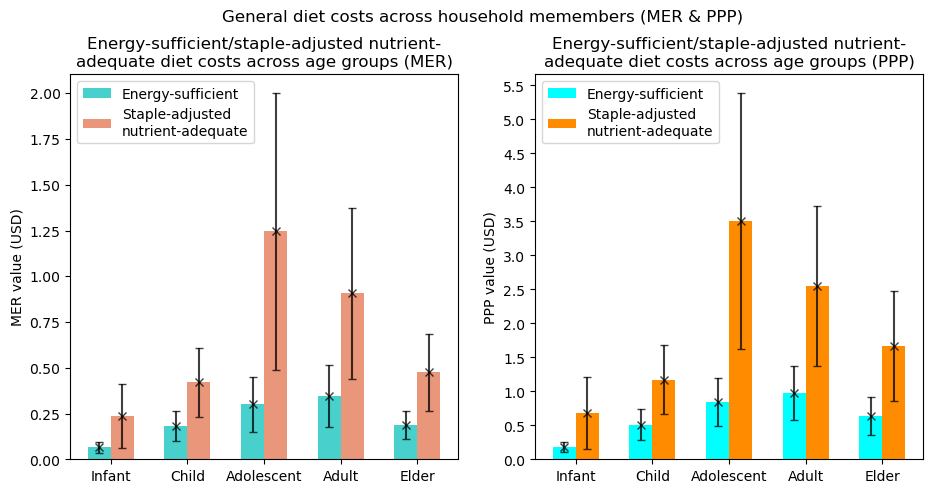

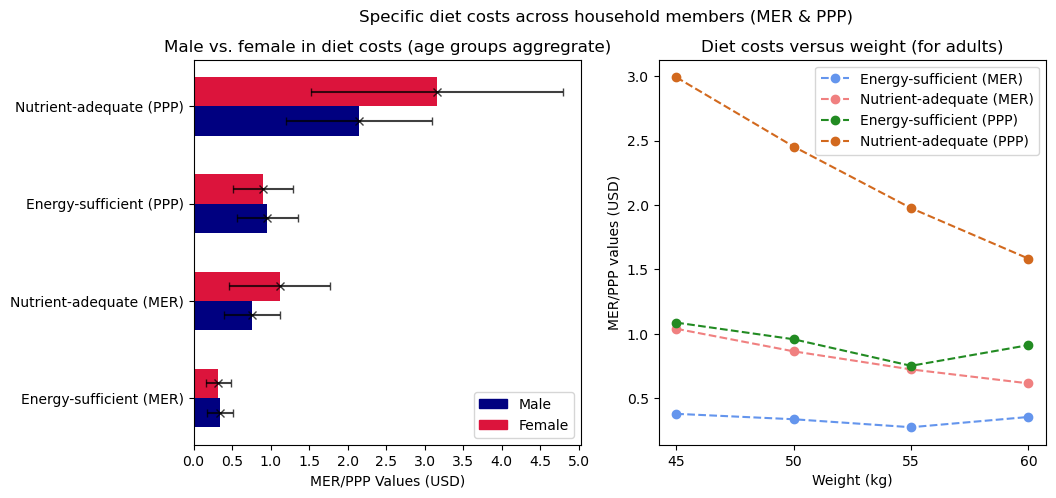

In [312]:
from matplotlib.patches import Patch

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
fig1.suptitle("General diet costs across household memembers (MER & PPP)", y=1.01)
fig2.suptitle("Specific diet costs across household members (MER & PPP)")

labels = ("Energy-sufficient", "Staple-adjusted\nnutrient-adequate")
for n, i in enumerate(("mediumturquoise", "darksalmon")):
    ax1.bar(
        np.arange(5)-0.15+0.3*n, # x-position; quick maths with widths
        pivot_table1["mean"].iloc[:, n], # means as heights
        0.3, # widths
        label=labels[n],
        color=i,
    )
    ax1.errorbar(
        np.arange(5)-0.15+0.3*n,
        pivot_table1["mean"].iloc[:, n],
        yerr=pivot_table1["std"].iloc[:, n],
        linestyle="none",
        color="black",
        marker="x",
        capsize=3,
        alpha=0.75
    )
ax1.set_title("Energy-sufficient/staple-adjusted nutrient-\nadequate diet costs across age groups (MER)")
ax1.set_xticks(np.arange(5), pivot_table1.index)
ax1.set_ylabel("MER value (USD)")
ax1.legend()

for n, i in enumerate(("aqua", "darkorange")):
    ax2.bar(
        np.arange(5)-0.15+0.3*n,
        pivot_table1["mean"].iloc[:, n+2],
        0.3,
        label=labels[n],
        color=i
    )
    ax2.errorbar(
        np.arange(5)-0.15+0.3*n,
        pivot_table1["mean"].iloc[:, n+2],
        yerr=pivot_table1["std"].iloc[:, n+2],
        linestyle="none",
        color="black",
        marker="x",
        capsize=3,
        alpha=0.75
    )
ax2.set_title("Energy-sufficient/staple-adjusted nutrient-\nadequate diet costs across age groups (PPP)")
ax2.set_xticks(np.arange(5), pivot_table1.index)
ax2.set_yticks(np.linspace(0, 5.5, 12), np.linspace(0, 5.5, 12))
ax2.set_ylabel("PPP value (USD)")
ax2.legend()

labels = ("Energy-sufficient (MER)", "Nutrient-adequate (MER)", "Energy-sufficient (PPP)", "Nutrient-adequate (PPP)")
for i in range(4):
    for n, j in enumerate(("navy", "crimson")):
        ax3.barh(
            i-0.15+0.3*n,
            pivot_table2["mean"].iloc[n, i],
            0.3,
            color=j,
        )
        ax3.errorbar(
            pivot_table2["mean"].iloc[n, i],
            i-0.15+0.3*n,
            xerr=pivot_table2["std"].iloc[n, i],
            linestyle="none",
            color="black",
            marker="x",
            capsize=3,
            alpha=0.75
        )
ax3.set_title("Male vs. female in diet costs (age groups aggregrate)")
ax3.set_xticks(np.linspace(0, 5, 11), np.linspace(0, 5, 11))
ax3.set_xlabel("MER/PPP Values (USD)")
ax3.set_yticks(
    np.arange(4), 
    labels
)
legend_handles = [ # have to make custome legend handles because "label=" parameter makes repeats
    Patch(color="navy", label="Male"),
    Patch(color="crimson", label="Female")
]
ax3.legend(handles=legend_handles)

for n, i in enumerate(colors): # bringing back the color scheme from previous visualization
    ax4.plot(
        pivot_table3.index,
        pivot_table3["mean"].iloc[:, n],
        marker="o",
        color=colors[n],
        linestyle="--",
        label=labels[n],
    )
ax4.set_title("Diet costs versus weight (for adults)")
ax4.set_xlabel("Weight (kg)")
ax4.set_ylabel("MER/PPP values (USD)")
ax4.legend()

plt.show()

#### __2.4.2__ Analysis: logistic regressions

## References:
<ul style="list-style-type:none;">
    <li>
        [1] <a href="https://www.sciencedirect.com/science/article/pii/S2211912424000609"> Turowska, Z., Klemm, J., de Pee, S. (2024). Analyzing diet cost and affordability: A dataset from Fill the Nutrient Gap analyses (2015-2021). <i>Global Food Security, 42</i>, 100798.
    </li>
    <li>
        [2] <a href="https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/">Create a stacked bar plot in Matplotlib. (Aug. 2024). <i>GeeksforGeeks</i>.</a>
    </li>
    <li>
        [3] <a href="https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3">Easy Way to Create Stacked Bar Charts from Dataframe. (Oct. 2021). <i>Medium</i>.</a>
    </li>
    <li>
        [4] <a href="https://stackoverflow.com/questions/75020518/matplotlib-stacked-bar-chart-change-position-of-error-bar">matplotlib stacked bar chart change position of error bar. (Jan. 2023). <i>stack overflow</i>.</a>
    </li>
</ul>